In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report


## Description Data

In [2]:
df = pd.read_csv("fraud_detection_train.csv")

In [3]:
df.head(10)

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
5,6,1016,117,SC,L,0,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
6,7,202,26,SC,L,73,1,3,L,1,...,0,0,0,0,0,0,0,0,0,1
7,8,2101,309,KM,P,64,2,0,H,0,...,0,0,0,0,0,0,1,0,0,1
8,9,1013,111,B,P,21,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
9,10,903,113,A,P,44,1,3,W,3,...,0,0,0,0,0,0,1,0,0,1


In [4]:
df.tail()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
200212,200213,2102,353,B,P,48,2,0,Z,0,...,0,0,0,0,0,0,1,0,0,0
200213,200214,1308,212,SD,L,1,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200214,200215,201,38,SB,P,3,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200215,200216,1008,128,B,P,52,1,1,J,1,...,0,0,0,0,0,0,1,0,0,0
200216,200217,1016,117,SC,L,4,1,1,K,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,...,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,...,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,...,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,2.000000,4.000000,4.000000,3.000000,7.000000,23.000000,1.000000,0.0,1.000000


In [8]:
df.shape

(200217, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [7]:
# Jumlah label yang unik
df['label'].value_counts()

1    100255
0     99962
Name: label, dtype: int64

## Exploratory Data Analysis(EDA)

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(, labels = candy_names, autopct='%1.0f%%')
ax.set_title('Diagram Permen Favorit')

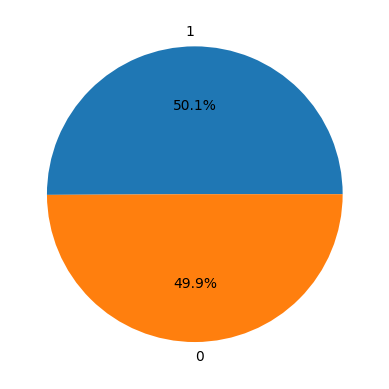

In [11]:
// perbandingan froud dan nonfroud
counts = df['label'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13800\2904304960.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


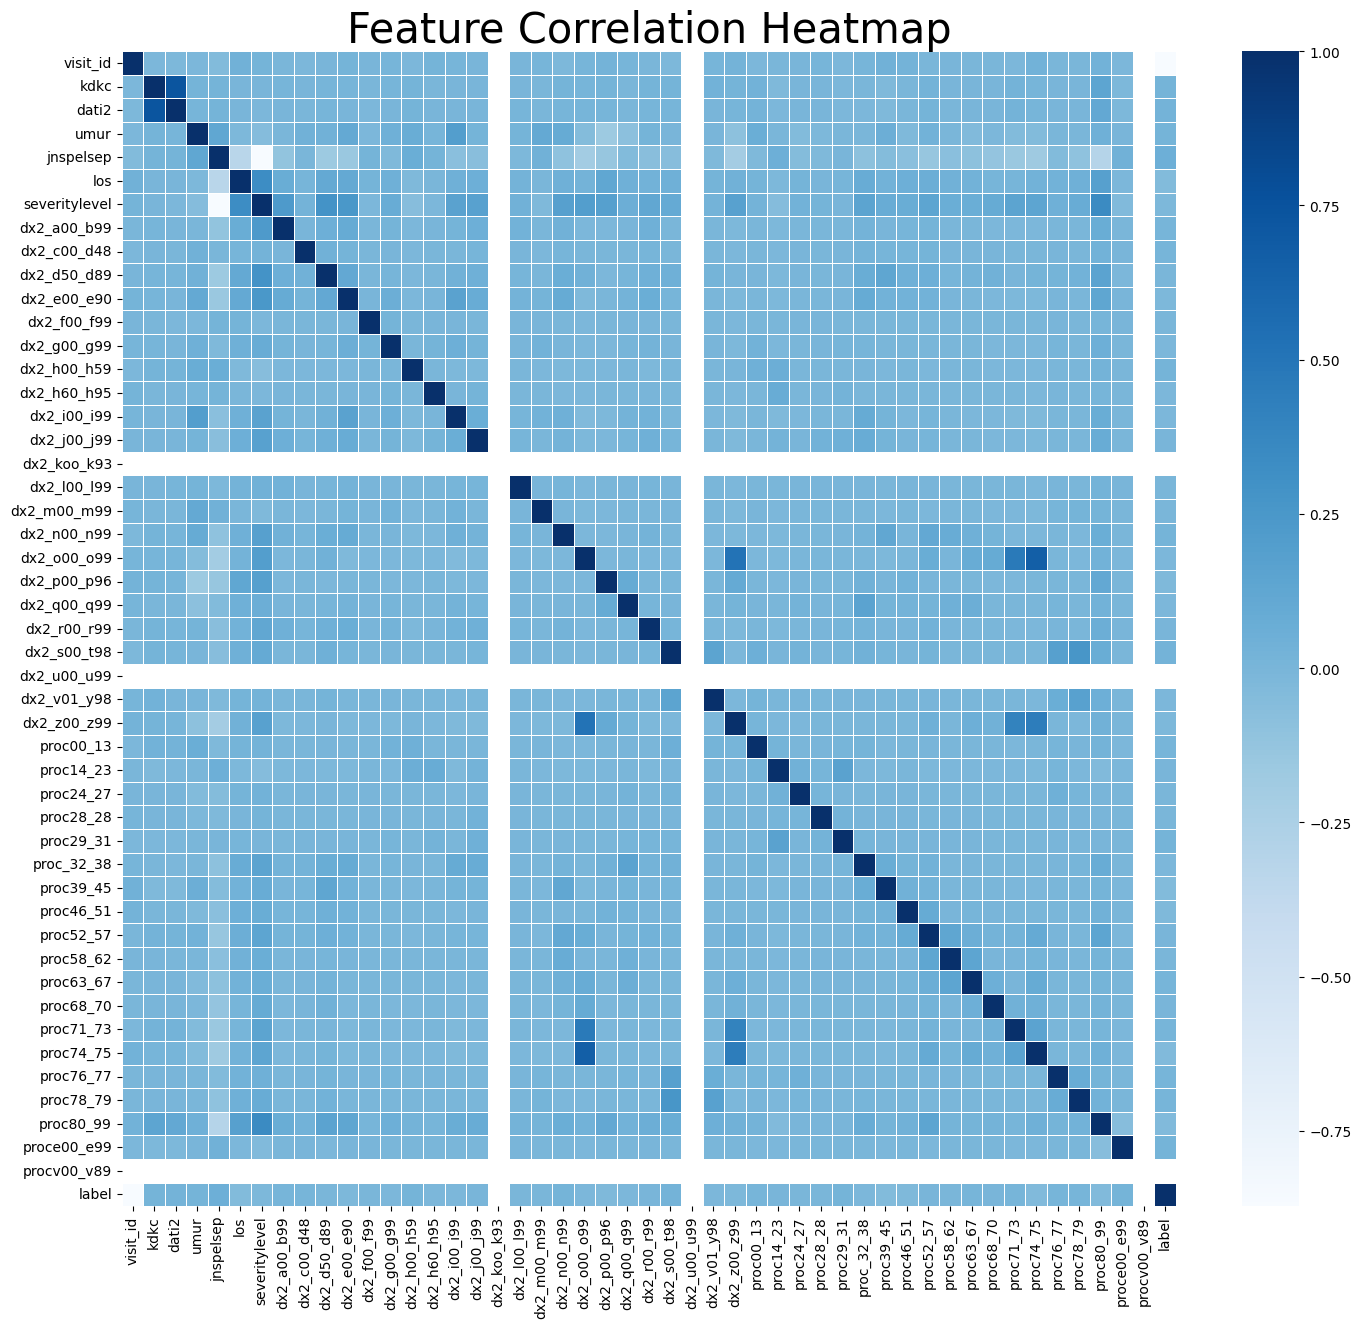

In [16]:
# Load the dataset

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', linewidths=.5)

plt.title('Feature Correlation Heatmap', fontsize=30)

plt.show()